Prediction of Spot Heights of Earth Surface using Nothing and Easting Values Datasets.

Methodology:
The data was collected using  topographic survey techniques. The dataset represents data obtained from the topographic survey of the University of Lagos Nigeria Terrains. It is made up of 9300+ instances having Nothing, Easting, and spot height values. The dataset is in CSV format. No missing data.
The objective of this project is to use the datasets to develop a digital models that can capture relationships among the  Easting, Nothing feature values and the target Spot Heights using Machine Learning Regression Techniques. The final model is expected to predict spot height in meters of any point on Earth surface with defined Easting and Northing values 

In [1]:
 #import tools
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as pl
import numpy as n
import os
import seaborn as sn
#import data from local file
data=open('F:\TOPO_DATA.csv')

#Read data using pandas' read_csv method
Topo_Data=pd.read_csv(data, index_col='S/N')

#Change Columns' names
Topo_Data.columns=['Easting','Northing','Spot_Height']

#View data
Topo_Data.head(5)

,Easting,Northing,Spot_Height
S/N,,,
1,544079.776,720172.309,1.012
2,543279.402,720468.302,1.021
3,543279.472,720468.390,1.025
4,542778.571,720464.031,1.032
5,544080.839,720170.246,1.046


In [2]:
#Check Nunmber of instances
print('Number of instances, No of features')
Topo_Data.shape[0],Topo_Data.shape[1]

Number of instances, No of features


(9373, 3)

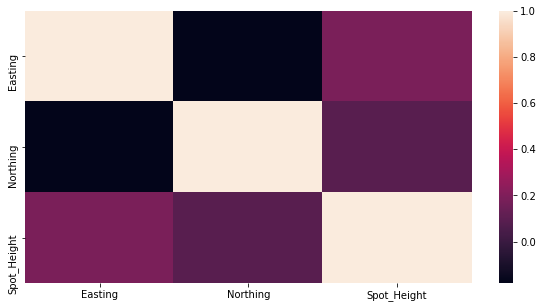

In [3]:
#Explore the data through visualization
pl.figure(figsize=(10,5))
sn.heatmap(Topo_Data.corr(),cbar=True)
pl.show()


There is no strong correlation among the variables as depicted with the heatmap above

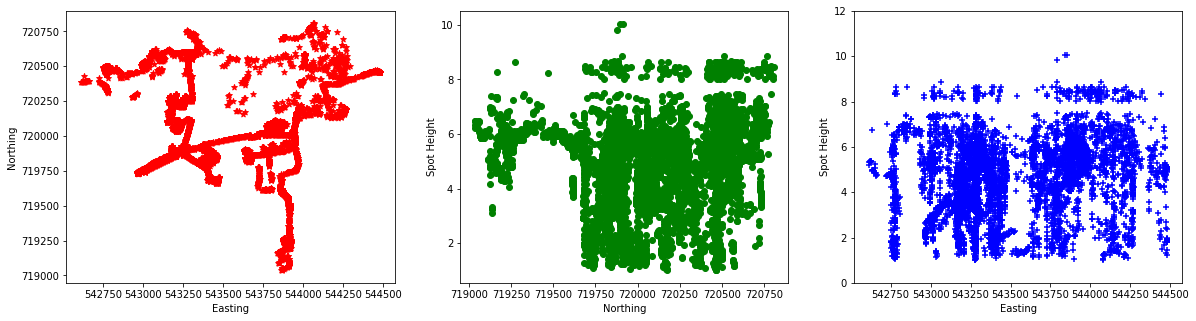

In [4]:
#Plots to explore the relationships among variables
pl.figure(figsize=(20,5))
pl.subplot(1,3,3)
pl.ylabel("Spot Height")
pl.xlabel('Easting')
pl.scatter(list(Topo_Data['Easting'].values),list(Topo_Data['Spot_Height'].values), c="blue", marker='+')
pl.ylim(0,12)
pl.subplot(132)
pl.ylabel("Spot Height")
pl.xlabel('Northing')
pl.scatter(list(Topo_Data['Northing'].values),list(Topo_Data['Spot_Height'].values), c="green", marker='o')
pl.subplot(131)
pl.ylabel("Northing")
pl.xlabel('Easting')
pl.scatter(list(Topo_Data['Easting'].values),list(Topo_Data['Northing'].values), c="red", marker='*')
pl.show()



There is salient non-linear relationship among those variables defining the data based on the above figures

In [5]:
#Create data split function
def data_split(data):
    random_state=1
    Split_idx=n.random.permutation(len(data))
    n_ins=int(0.20*len(data))#no of instances
    Test_idx=Split_idx[:n_ins]
    Train_idx=Split_idx[n_ins:]
    return data.iloc[Train_idx],data.iloc[Test_idx]

#split data into train, validate, test datasets
Train_data,Test_Data=data_split(Topo_Data)
#shapes of various datasets
Test_Data.shape,Train_data.shape,Topo_Data.shape

((1874, 3), (7499, 3), (9373, 3))

In [6]:
#Create validation data from Train_data
Remain_Train_data,Val_data=data_split(Train_data)
#Val_data.shape,Remain_Train_data.shape

#split datasets into feature dataset and target dataset
Train_target=Remain_Train_data["Spot_Height"].values
cols=["Easting","Northing"]
Train_features=Remain_Train_data[cols].values

#validation data 
Val_target=Val_data["Spot_Height"].values
Val_features=Val_data[cols].values
#shapes of target datasets
Val_target.shape,Train_target.shape

((1499,), (6000,))

In [7]:
#Normalizing the datasets for easy model training and effective model performance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_fit=scaler.fit(Train_features)
Normalized_Train=scaler_fit.transform(Train_features)
Normalized_val=scaler_fit.transform(Val_features)

In [8]:
#Train stochastic gradient Regression model
from sklearn.linear_model import SGDRegressor
#create an instance of the Regression Class
lreg=SGDRegressor(alpha=0.01,eta0=0.01,epsilon=10)
#fit the model
lreg.fit(Normalized_Train,Train_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=10,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [9]:
# Print the model coefficients ang intercept
print(lreg.coef_,lreg.intercept_)


[0.30863756 0.16430144] [4.67287337]


In [10]:
#Validate model by predicting validation target dataset
y_hat=lreg.predict(Normalized_val)
for i in range(5):
    print('Validation Target %f, Predicted %f' %(Val_target[i],y_hat[i]))

Validation Target 3.867000, Predicted 4.454878
Validation Target 5.504000, Predicted 4.603255
Validation Target 5.310000, Predicted 4.412703
Validation Target 2.066000, Predicted 4.476717
Validation Target 5.513000, Predicted 4.998555


In [11]:
Train_accuracy,Validation_Accuracy=lreg.score(Normalized_Train,Train_target),lreg.score(Normalized_val,Val_target)
print('Train_Accuracy: %.2f ;  Validation_Accuracy: %.2f'%(Train_accuracy,Validation_Accuracy))


Train_Accuracy: 0.04 ;  Validation_Accuracy: 0.06


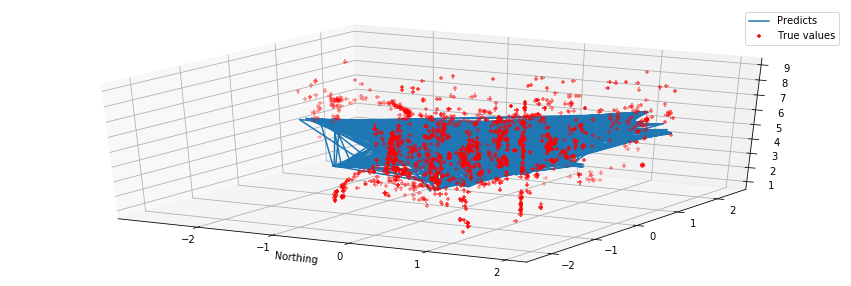

In [12]:
fig=pl.figure(figsize=(15,5))
ax=fig.gca(projection='3d')
ax.scatter(list(Normalized_val[:,1]),list(Normalized_val[:,0]),Val_target,marker='+',color='red',label="True values")
ax.plot(list(Normalized_val[:,1]),list(Normalized_val[:,0]),y_hat,label="Predicts")
ax.set_xlabel('Northing')
pl.legend()
pl.show()

In [13]:
#A trial with SVM Regressor
from sklearn.svm import SVR
svr_model=SVR(gamma=2000, C=10.0)
y_hat_svr=svr_model.fit(Normalized_Train,Train_target).predict(Normalized_val)
Train_accuracy,Validation_Accuracy=svr_model.score(Normalized_Train,Train_target),svr_model.score(Normalized_val,Val_target)
print('Train_accuracy: %.4f   Validation_Accuracy: %.4f'%(Train_accuracy,Validation_Accuracy))

Train_accuracy: 0.8898   Validation_Accuracy: 0.6564


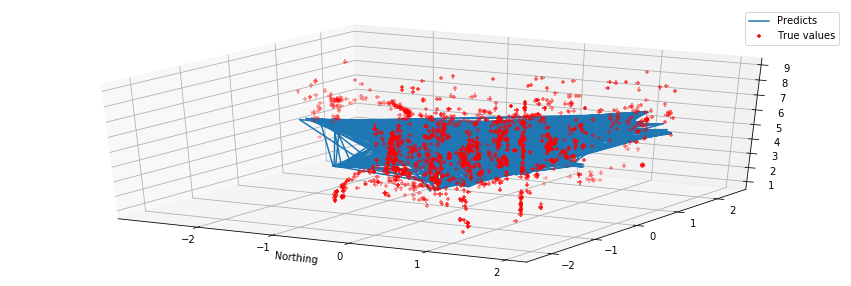

In [14]:
# A 3D view of distribution of predicts againdt true value
fig=pl.figure(figsize=(15,5))
ax=fig.gca(projection='3d')
ax.scatter(list(Normalized_val[:,1]),list(Normalized_val[:,0]),Val_target,marker='+',color='red',label="True values")
ax.plot(list(Normalized_val[:,1]),list(Normalized_val[:,0]),y_hat,label="Predicts")
ax.set_xlabel('Northing')
pl.legend()
pl.show()

In [15]:
#View of True values against the predicted by SVM regressor
y_hat=svr_model.predict(Normalized_val)
Value_Set_SVM={'True Value':Val_target,'Predicts':y_hat_svr}
pd_View=pd.DataFrame(Value_Set_SVM)
pd_View.tail(5)

,True Value,Predicts
1494,4.745,4.799838
1495,4.220,3.729037
1496,4.978,4.990567
1497,4.630,4.538040
1498,6.712,3.993378


In [16]:
# A trial with RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(max_depth=30,n_estimators=100,random_state=11)
y_hat_r=model.fit(Normalized_Train,Train_target).predict(Normalized_val)
Train_accuracy,Validation_Accuracy=model.score(Normalized_Train,Train_target),model.score(Normalized_val,Val_target)
Train_accuracy,Validation_Accuracy

(0.9635239523771361, 0.7194050864630344)

In [17]:
Value_Set={'True Value':Val_target,'Predicts':y_hat_r}
pd_View2=pd.DataFrame(Value_Set)
pd_View2.iloc[140:145]

,True Value,Predicts
140,4.069,4.069960
141,3.581,3.631520
142,5.666,5.614348
143,5.575,5.668987
144,5.848,5.992733


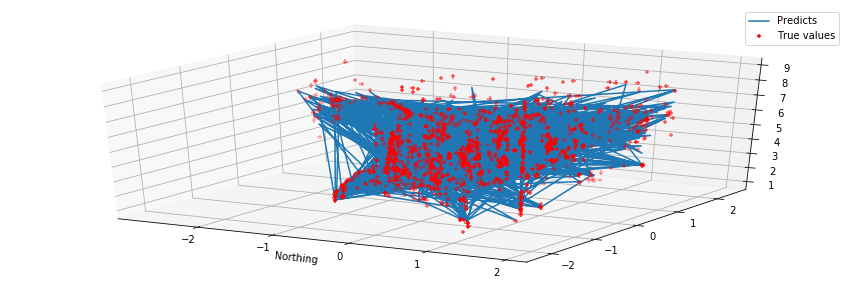

In [18]:
fig=pl.figure(figsize=(15,5))
ax=fig.gca(projection='3d')
ax.scatter(list(Normalized_val[:,1]),list(Normalized_val[:,0]),Val_target,marker='+',color='red',label="True values")
ax.plot(list(Normalized_val[:,1]),list(Normalized_val[:,0]),y_hat_r,label="Predicts")
ax.set_xlabel('Northing')
pl.legend()
pl.show()


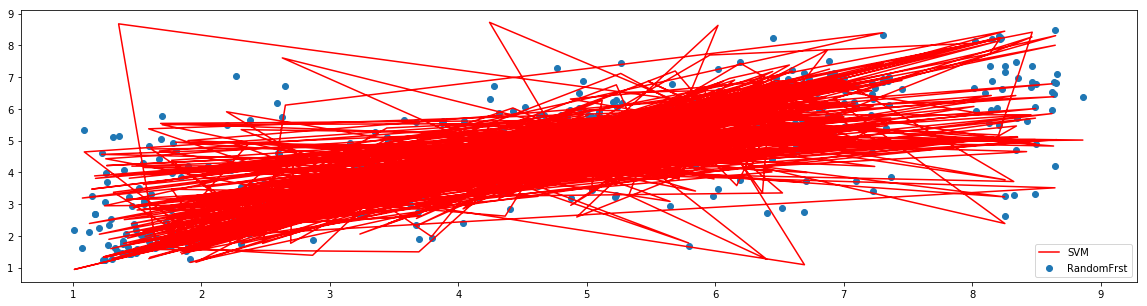

In [19]:
#Comparison of performance of SVR and RandomForest Models
fig=pl.figure(figsize=(20,5))
pl.plot(list(pd_View['True Value'].values),list(pd_View['Predicts'].values),color='red',label="SVM")
pl.scatter(list(pd_View['True Value'].values),list(pd_View2['Predicts'].values),label='RandomFrst')
pl.legend()
pl.show()


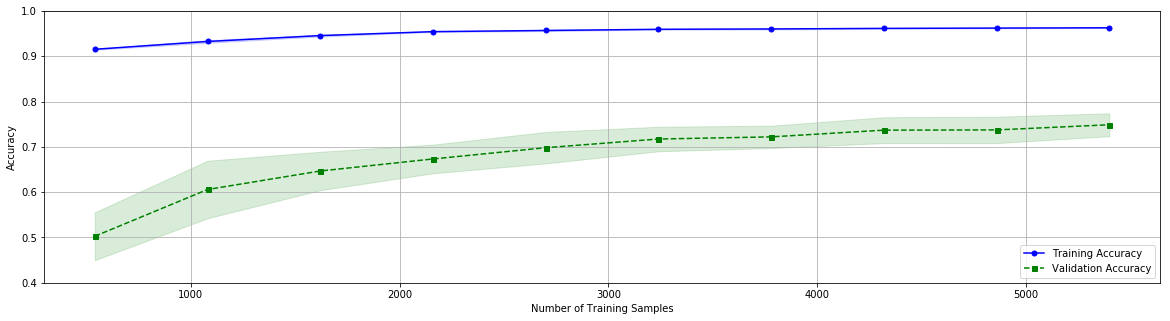

In [20]:
#It seems RandomForestRegressor is promising
#Validation of RandomForestRegresor model using Cross-validation

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =learning_curve(estimator=model,X=Normalized_Train,y=Train_target,train_sizes=n.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1)
train_mean = n.mean(train_scores, axis=1)
train_std = n.std(train_scores, axis=1)
test_mean = n.mean(test_scores, axis=1)
test_std = n.std(test_scores, axis=1)
pl.figure(figsize=(20,5))
pl.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training Accuracy')
pl.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')
pl.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation Accuracy')
pl.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
pl.grid()
pl.xlabel('Number of Training Samples')
pl.ylabel('Accuracy')
pl.legend(loc='lower right')
pl.ylim([0.4, 1.0])
pl.show()

There is sense of overfitting of the randomforest regressor model as shown in the learning curves above

In [34]:
#Optimization of RandomForest Model
from sklearn.model_selection import GridSearchCV
n_estimators = [10,100,300,500]
max_depth = [10,20,30,50] 
#Create dictionary hyperparameter candidates
hyperparameters={'max_depth':max_depth, 'n_estimators':n_estimators}
# Create grid search
gridsearch = GridSearchCV(model, hyperparameters, cv=10, verbose=0)
# Fit grid search
best_model = gridsearch.fit(Normalized_Train,Train_target)

In [35]:
#Testing phase: 
print('Best No of Estimator:' , best_model. best_estimator_. get_params()['n_estimators' ])
print('Best Max Dept:' , best_model. best_estimator_. get_params()['max_depth' ])
Test_features=Test_Data[cols]
Test_targets=Test_Data["Spot_Height"].values
N_test_data=scaler_fit.transform(Test_features)
Test_predict_Accuracy=best_model.score(N_test_data,Test_targets)
print('Test data Accuracy: %.2f'% Test_predict_Accuracy)

Best No of Estimator: 500
Best Max Dept: 20
Test data Accuracy: 0.74


In [42]:
#RandomForestRegressor model tested with Out-Of-Vocabulary dataset
Predicts=best_model.predict(N_test_data)
Value_Set={'True Value':Test_targets,'Predicts':Predicts}
pd_View3=pd.DataFrame(Value_Set)
pd_View3[130:135]

,True Value,Predicts
130,5.245,4.702712
131,1.642,2.235264
132,4.739,4.711110
133,8.394,5.673888
134,5.098,5.085470


In [46]:
#Test model on Train dataset
best_model.predict(Normalized_Train)[:10],Train_target[:10]

(array([2.33914307, 3.497116  , 1.68196   , 5.2880618 , 3.51458165,
        4.65176551, 3.722388  , 5.67595316, 3.43148577, 6.21365078]),
 array([2.271, 3.565, 1.677, 5.351, 3.517, 4.668, 3.699, 5.626, 3.39 ,
        6.259]))

In [47]:
#save the best model for the prediction of spot height in meters using easting and Northing values as Topographic_model

from sklearn.externals import joblib
joblib.dump(best_model,"Topographic_model.pkl" )

['Topographic_model.pkl']

Thanks for taking your time to read the work!